In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [81]:
df = pd.read_parquet('rent_clean_2019_09_09T19_30_03.parquet')
df.head()

,balcony,building_height,building_material,building_type,building_year,desc_len,direct,flat_state,floor,heating,...,internet_no_info,gas_no_info,building_material_brick,building_material_concrete_slab,building_material_other,building_type_apart,building_type_block,building_type_hist,building_type_house,building_type_other
0,0.0,4.0,3,2,29.0,900,0,3,2.0,3.0,...,1,1,1,0,0,0,0,0,0,1
1,0.0,1.0,3,1,1.0,516,0,3,0.0,3.0,...,1,1,1,0,0,0,1,0,0,0
2,0.0,4.0,3,3,1.0,784,0,3,1.0,3.0,...,1,1,1,0,0,1,0,0,0,0
3,0.0,4.0,3,1,1.0,887,0,3,0.0,3.0,...,1,1,1,0,0,0,1,0,0,0
4,0.0,4.0,3,2,1.0,428,0,3,3.0,3.0,...,1,1,1,0,0,0,0,0,0,1


In [82]:
coords = df.loc[:,['lat', 'lon', 'price_m2']]
coords['lat'] = coords['lat'] * (10 ** 8)
coords['lon'] = coords['lon'] * (10 ** 8)
coords['lat_grid'] = coords['lat']//1000000
coords['lon_grid'] = coords['lon']//1000000
lons_len = len(coords['lon_grid'].value_counts())
lats_len = len(coords['lat_grid'].value_counts())

grid = [[0 for x in range(lats_len)] for x in range(lons_len)]
     

In [86]:
coords['lon_grid'].value_counts().sort_values()

2269.0       1
1768.0       1
1672.0       1
2270.0       1
2009.0       1
2221.0       1
2343.0       1
1477.0       1
1833.0       1
1462.0       1
1559.0       1
2274.0       1
1741.0       1
1511.0       1
2294.0       1
1533.0       1
2037.0       1
1834.0       1
2350.0       1
1716.0       1
1637.0       1
1630.0       1
1546.0       1
1930.0       1
2013.0       1
1502.0       1
2158.0       1
2179.0       1
1750.0       1
1499.0       1
          ... 
2093.0     652
1702.0     669
1455.0     672
1701.0     703
1705.0     724
1859.0     799
1997.0     825
2108.0     889
2095.0     927
1703.0    1092
1989.0    1101
1990.0    1118
1991.0    1377
2106.0    1392
2104.0    1524
2096.0    1616
1996.0    1667
2107.0    1715
2105.0    1906
1994.0    2022
1995.0    2166
1993.0    2170
1992.0    2343
2097.0    2349
2103.0    2934
2100.0    3425
2098.0    3823
2101.0    4374
2102.0    4404
2099.0    5234
Name: lon_grid, Length: 647, dtype: int64

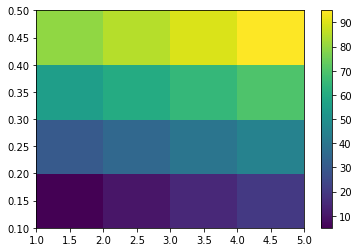

In [65]:
'''
Most heatmap tutorials I found online use pyplot.pcolormesh with random sets of
data from Numpy; I just needed to plot x, y, z values stored in lists--without
all the Numpy mumbo jumbo. Here I have code to plot intensity on a 2D array, and
I only use Numpy where I need to (pcolormesh expects Numpy arrays as inputs).
'''

#here's our data to plot, all normal Python lists
x = coords['lon_grid']
y = coords['lat_grid']

intensity = [
    [5, 10, 15, 20, 25],
    [30, 35, 40, 45, 50],
    [55, 60, 65, 70, 75],
    [80, 85, 90, 95, 100],
    [105, 110, 115, 120, 125]
]

#setup the 2D grid with Numpy
x, y = np.meshgrid(x, y)

#convert intensity (list of lists) to a numpy array for plotting
intensity = np.array(intensity)

#now just plug the data into pcolormesh, it's that easy!
plt.pcolormesh(x, y, intensity)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show() #boom